___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.11.5


In [4]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [6]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [8]:
df = pd.read_csv("1-Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
#print the shape of our data, 10000 rows and 14 columns
df.shape

(10000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
#Check for null values
df.isnull().sum().any()

False

In [13]:
##Check for duplicated values
df.duplicated().sum().any()

False

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [15]:
df.describe(include="O").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
#print our features (columns)
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
#Drop the features that not suitable for modelling
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [18]:
#count values of Geography feature
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
#count values of Gender feature
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
#count values of our label --> Exited
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

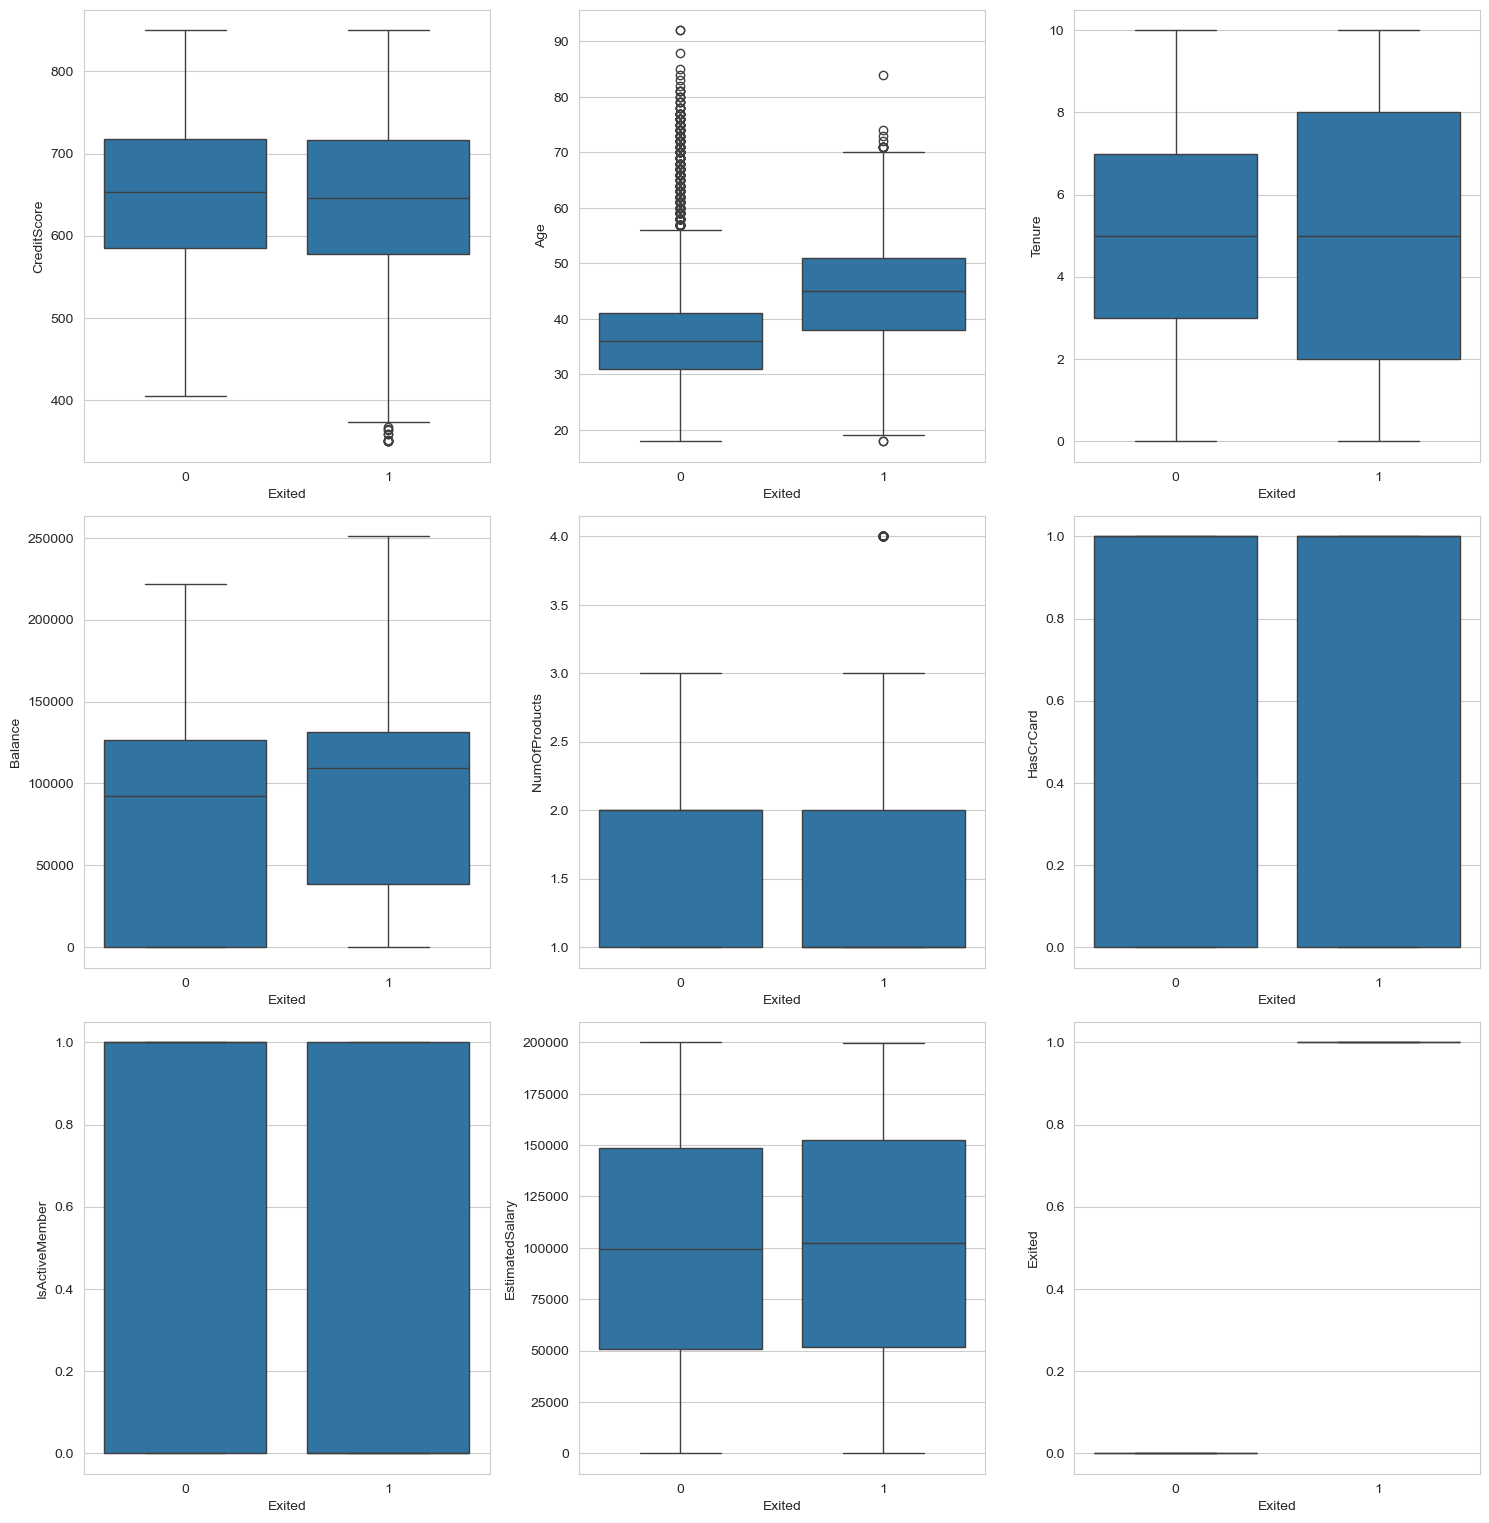

In [21]:
# Using the boxplot we can see the most distinguishing features and potential outliers

fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df[col], data=df)

plt.tight_layout();

In [22]:
# Convert categorical variables to dummy variables using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
columns_to_encode = ['Geography', 'Gender']

In [23]:
# represent categorical data as numerical features suitable for use 
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

C:\Users\Taifa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# label the binary columns generated during one-hot encoding, making it clear which category each binary column corresponds to
encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [26]:
# replace the original categorical columns in a DataFrame (df) with the one-hot encoded columns
df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


<Axes: xlabel='Exited', ylabel='count'>

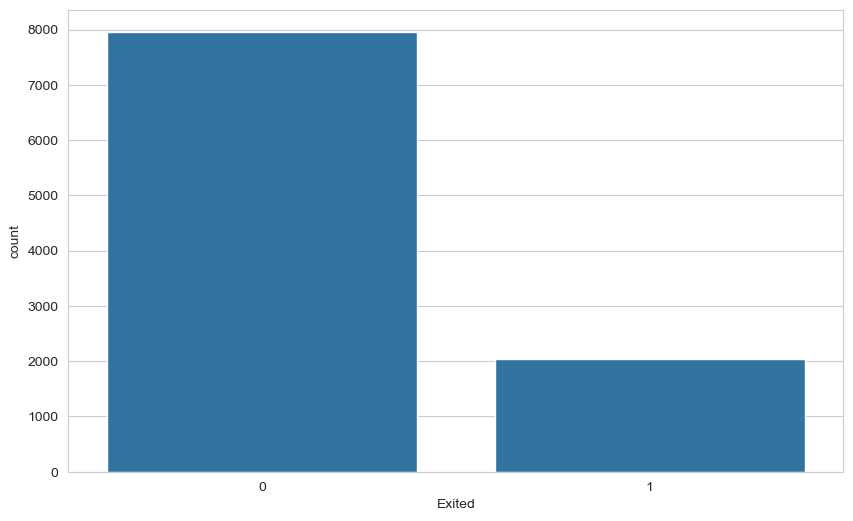

In [28]:
# understanding the distribution of categorical data and assessing the balance or imbalance between categories in a dataset
sns.countplot(x=df["Exited"])
# as it shown we have imbalance data

<Axes: xlabel='Age', ylabel='Count'>

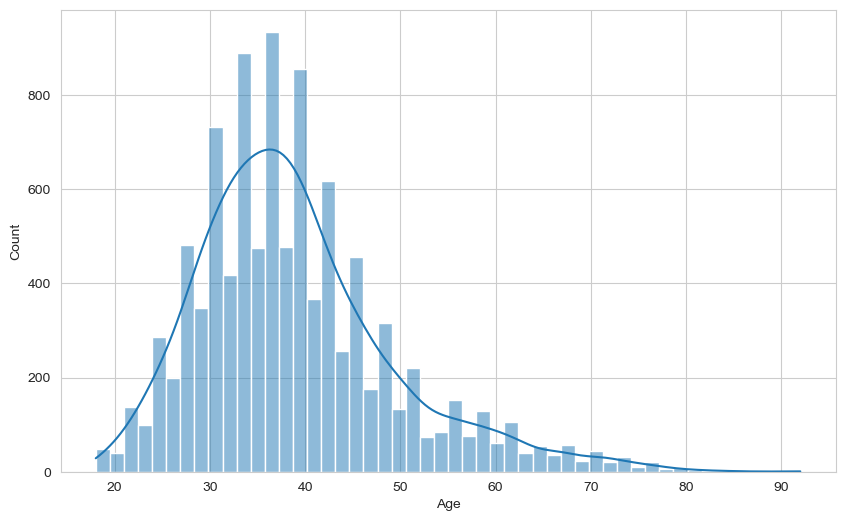

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df.Age, bins=50, kde=True)

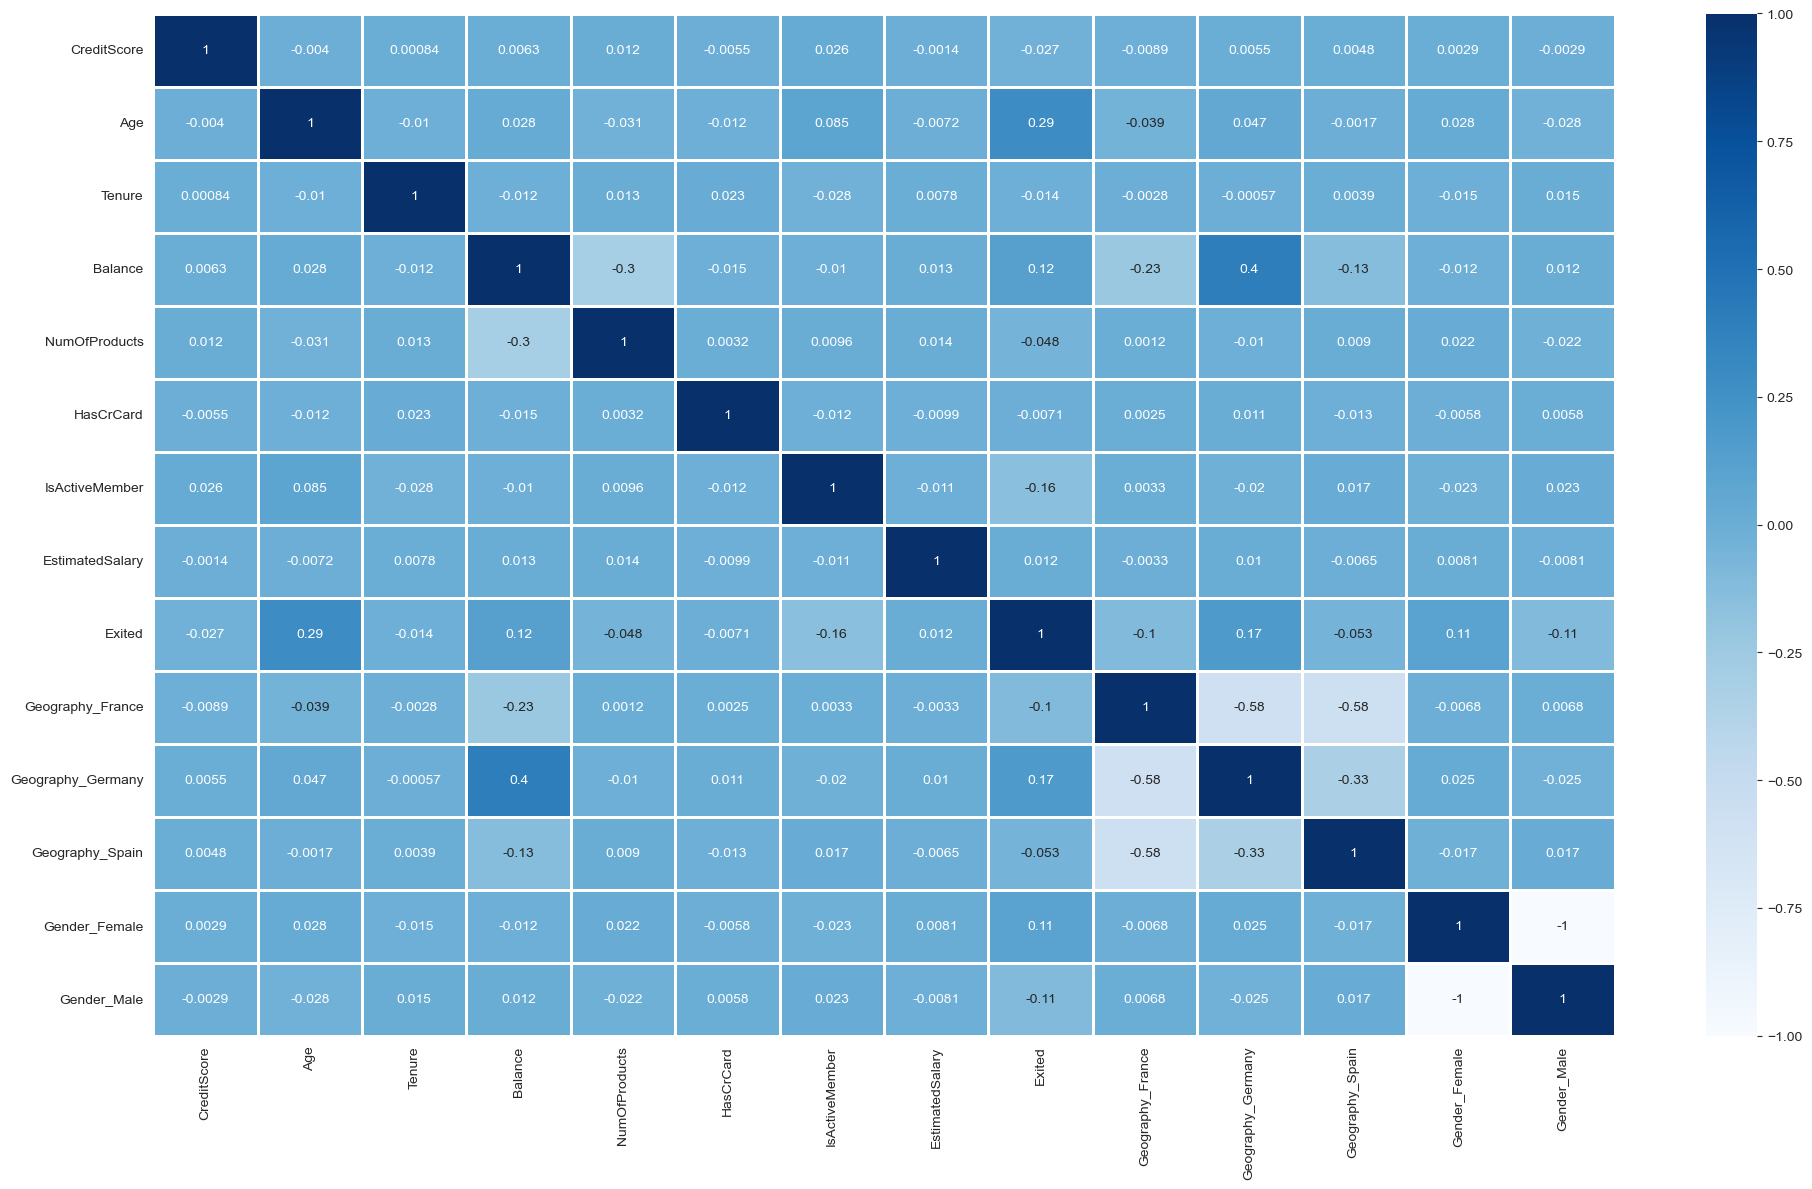

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Blues")
plt.tight_layout()

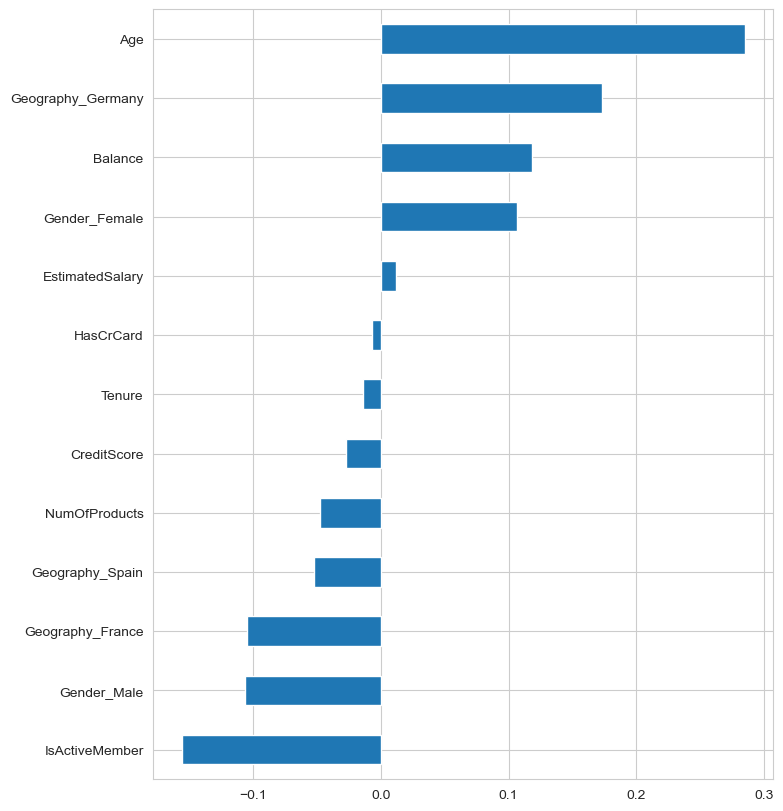

In [31]:
plt.figure(figsize=(8, 10))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [33]:
seed=42

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=seed)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train.shape

(9000, 13)

In [38]:
X_test.shape

(1000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [41]:
# NOTE: I've used the epochs=150 due to the limited time but ussually i must use 1000 or 1500
model.fit(
    x=X_train, y=y_train, validation_split=0.1,
    batch_size=32, epochs=150, verbose=1)

Epoch 1/150
254/254 [==============================] - 5s 9ms/step - loss: 0.5016 - recall: 0.0412 - val_loss: 0.4497 - val_recall: 0.0000e+00
Epoch 2/150
254/254 [==============================] - 2s 6ms/step - loss: 0.4543 - recall: 0.0393 - val_loss: 0.4238 - val_recall: 0.0663
Epoch 3/150
254/254 [==============================] - 2s 6ms/step - loss: 0.4322 - recall: 0.1707 - val_loss: 0.3945 - val_recall: 0.2597
Epoch 4/150
254/254 [==============================] - 1s 6ms/step - loss: 0.4160 - recall: 0.2294 - val_loss: 0.3742 - val_recall: 0.3646
Epoch 5/150
254/254 [==============================] - 1s 6ms/step - loss: 0.3981 - recall: 0.3051 - val_loss: 0.3501 - val_recall: 0.3481
Epoch 6/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3802 - recall: 0.3384 - val_loss: 0.3290 - val_recall: 0.4420
Epoch 7/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3673 - recall: 0.3844 - val_loss: 0.3165 - val_recall: 0.4309
Epoch 8/150
254/254 [==

254/254 [==============================] - 2s 6ms/step - loss: 0.3252 - recall: 0.4824 - val_loss: 0.3006 - val_recall: 0.5470
Epoch 60/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3268 - recall: 0.4824 - val_loss: 0.2904 - val_recall: 0.5635
Epoch 61/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3232 - recall: 0.4849 - val_loss: 0.2897 - val_recall: 0.4917
Epoch 62/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3238 - recall: 0.4837 - val_loss: 0.2932 - val_recall: 0.5359
Epoch 63/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3240 - recall: 0.4788 - val_loss: 0.2998 - val_recall: 0.5967
Epoch 64/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3244 - recall: 0.4843 - val_loss: 0.2925 - val_recall: 0.5414
Epoch 65/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3219 - recall: 0.4909 - val_loss: 0.2928 - val_recall: 0.5193
Epoch 66/150
254/254 [===========

254/254 [==============================] - 2s 6ms/step - loss: 0.3069 - recall: 0.5127 - val_loss: 0.3019 - val_recall: 0.5138
Epoch 118/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3089 - recall: 0.5073 - val_loss: 0.2949 - val_recall: 0.6022
Epoch 119/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3079 - recall: 0.5157 - val_loss: 0.2925 - val_recall: 0.6298
Epoch 120/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3085 - recall: 0.5182 - val_loss: 0.2996 - val_recall: 0.5304
Epoch 121/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3060 - recall: 0.5169 - val_loss: 0.3101 - val_recall: 0.6464
Epoch 122/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3068 - recall: 0.5169 - val_loss: 0.3109 - val_recall: 0.4586
Epoch 123/150
254/254 [==============================] - 2s 6ms/step - loss: 0.3070 - recall: 0.5157 - val_loss: 0.3076 - val_recall: 0.6409
Epoch 124/150
254/254 [====

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 36) dtype=float32, numpy=
 array([[-0.52907944,  0.17538023, -0.22911996, -0.01929303,  0.19527711,
         -0.20314427,  0.3269302 ,  0.26895052,  0.2611234 ,  0.37645948,
          0.3196372 , -0.31962797,  0.08857471, -0.0917616 ,  0.20465438,
         -0.5229295 ,  0.32336167, -0.14146008,  0.05906697,  0.27487588,
         -0.47127265,  0.077511  ,  0.8012114 ,  0.1417728 ,  0.18150319,
          0.2752013 , -0.4480512 , -0.13009869,  0.2445373 ,  0.19467235,
         -0.07419729, -0.19074824,  0.05724115, -0.23658465,  0.11824582,
          0.32717562],
        [-0.38745594, -0.26092356,  0.49239072, -1.1925957 , -0.09902417,
          0.13281074,  0.38645452, -0.01335977,  0.29029375, -0.47165582,
          0.33062652, -0.19545439, -0.11323383,  0.5944013 ,  0.9484558 ,
         -0.25046122,  0.23548898, -0.26697132, -1.4254189 , -0.9028453 ,
          1.2556098 , -0.60413426,  0.40586597, -0.17560948,  0.5355721 ,
          1.1125022 ,

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [44]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.502,0.041,0.450,0.000
1,0.454,0.039,0.424,0.066
2,0.432,0.171,0.394,0.260
3,0.416,0.229,0.374,0.365
4,0.398,0.305,0.350,0.348


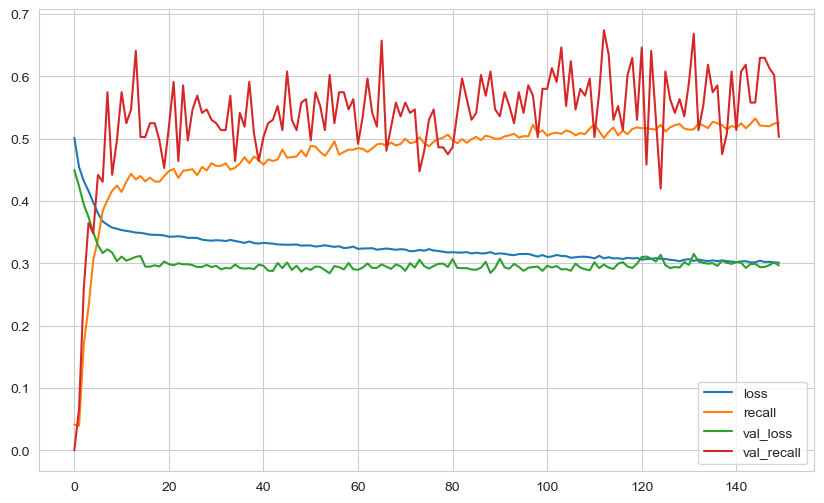

In [45]:
loss_df.plot()
plt.show()

In [46]:
model.evaluate(X_test, y_test, verbose=0)

[0.3546490967273712, 0.4117647111415863]

In [47]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.3546490967273712
Recall:  0.4117647111415863


In [48]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[767  29]
 [120  84]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.74      0.41      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



32/32 [==============================] - 0s 4ms/step


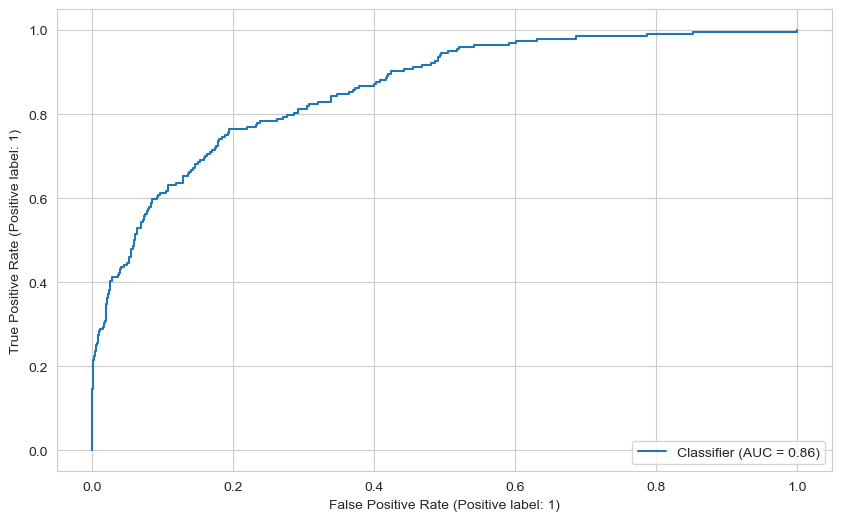

In [49]:
#Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model


# Make predictions using our model
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [50]:
# Calculate the AUC (Area Under the Curve)
roc_auc_score(y_test, y_pred_proba)

0.8586621834663513

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [51]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [52]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / 7963) * (10000 / 2.0)
weight_for_1 = (1 / 2037) * (10000 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [54]:
# ReCompile and train the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=150 ,class_weight=class_weight)

Epoch 1/150
240/240 [==============================] - 5s 9ms/step - loss: 0.6529 - recall: 0.5439 - val_loss: 0.6097 - val_recall: 0.6788
Epoch 2/150
240/240 [==============================] - 2s 6ms/step - loss: 0.6156 - recall: 0.6671 - val_loss: 0.5148 - val_recall: 0.5182
Epoch 3/150
240/240 [==============================] - 2s 6ms/step - loss: 0.5918 - recall: 0.6851 - val_loss: 0.5783 - val_recall: 0.7372
Epoch 4/150
240/240 [==============================] - 1s 6ms/step - loss: 0.5688 - recall: 0.6992 - val_loss: 0.5422 - val_recall: 0.7628
Epoch 5/150
240/240 [==============================] - 1s 6ms/step - loss: 0.5513 - recall: 0.7261 - val_loss: 0.5391 - val_recall: 0.8066
Epoch 6/150
240/240 [==============================] - 1s 6ms/step - loss: 0.5313 - recall: 0.7415 - val_loss: 0.5010 - val_recall: 0.7883
Epoch 7/150
240/240 [==============================] - 2s 6ms/step - loss: 0.5168 - recall: 0.7530 - val_loss: 0.4879 - val_recall: 0.8139
Epoch 8/150
240/240 [======

240/240 [==============================] - 1s 6ms/step - loss: 0.4343 - recall: 0.7819 - val_loss: 0.4746 - val_recall: 0.8431
Epoch 60/150
240/240 [==============================] - 2s 6ms/step - loss: 0.4381 - recall: 0.7819 - val_loss: 0.4695 - val_recall: 0.8650
Epoch 61/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4356 - recall: 0.7890 - val_loss: 0.3527 - val_recall: 0.7664
Epoch 62/150
240/240 [==============================] - 2s 6ms/step - loss: 0.4360 - recall: 0.7749 - val_loss: 0.4241 - val_recall: 0.8212
Epoch 63/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4353 - recall: 0.7806 - val_loss: 0.4166 - val_recall: 0.8139
Epoch 64/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4350 - recall: 0.7800 - val_loss: 0.3701 - val_recall: 0.7774
Epoch 65/150
240/240 [==============================] - 2s 6ms/step - loss: 0.4305 - recall: 0.7813 - val_loss: 0.4226 - val_recall: 0.8066
Epoch 66/150
240/240 [===========

240/240 [==============================] - 1s 6ms/step - loss: 0.4056 - recall: 0.7960 - val_loss: 0.4279 - val_recall: 0.7993
Epoch 118/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4058 - recall: 0.7915 - val_loss: 0.4589 - val_recall: 0.8175
Epoch 119/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4105 - recall: 0.8069 - val_loss: 0.4299 - val_recall: 0.7956
Epoch 120/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4044 - recall: 0.7973 - val_loss: 0.4669 - val_recall: 0.8285
Epoch 121/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4032 - recall: 0.8012 - val_loss: 0.5111 - val_recall: 0.8394
Epoch 122/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4019 - recall: 0.7954 - val_loss: 0.4504 - val_recall: 0.7993
Epoch 123/150
240/240 [==============================] - 2s 6ms/step - loss: 0.4003 - recall: 0.8018 - val_loss: 0.3884 - val_recall: 0.7628
Epoch 124/150
240/240 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.653,0.544,0.610,0.679
1,0.616,0.667,0.515,0.518
2,0.592,0.685,0.578,0.737
3,0.569,0.699,0.542,0.763
4,0.551,0.726,0.539,0.807


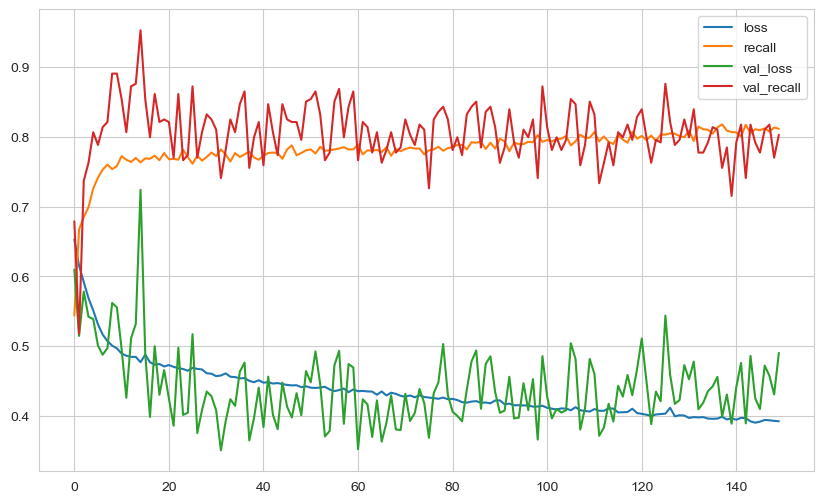

In [56]:
loss_df.plot()
plt.show()

In [57]:
model.evaluate(X_test, y_test, verbose=0)

[0.5102612972259521, 0.7843137383460999]

In [58]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5102612972259521
Recall:  0.7843137383460999


In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[600 196]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.45      0.78      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.76      0.78      1000



32/32 [==============================] - 0s 4ms/step


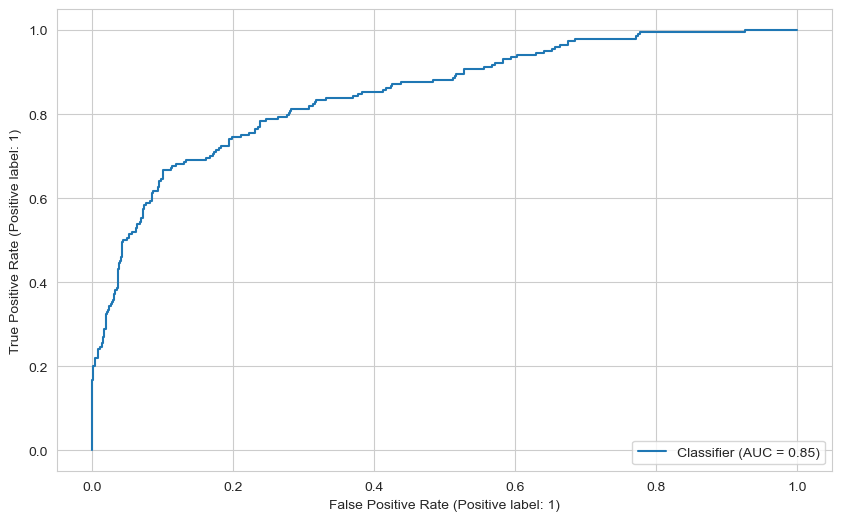

In [60]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [61]:
roc_auc_score(y_test, y_pred_proba)

0.8488151542023845

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [62]:
from tensorflow.keras.optimizers import Adam

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)  # default learning rate value is 0.001
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

In [64]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=150 ,class_weight=class_weight)

Epoch 1/150
240/240 [==============================] - 4s 9ms/step - loss: 0.6363 - recall: 0.6549 - val_loss: 0.5699 - val_recall: 0.6569
Epoch 2/150
240/240 [==============================] - 2s 6ms/step - loss: 0.5815 - recall: 0.7120 - val_loss: 0.4205 - val_recall: 0.4781
Epoch 3/150
240/240 [==============================] - 1s 6ms/step - loss: 0.5286 - recall: 0.7216 - val_loss: 0.3973 - val_recall: 0.7044
Epoch 4/150
240/240 [==============================] - 1s 6ms/step - loss: 0.5017 - recall: 0.7389 - val_loss: 0.4361 - val_recall: 0.7810
Epoch 5/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4967 - recall: 0.7492 - val_loss: 0.4821 - val_recall: 0.7701
Epoch 6/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4931 - recall: 0.7447 - val_loss: 0.4801 - val_recall: 0.8175
Epoch 7/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4859 - recall: 0.7556 - val_loss: 0.4039 - val_recall: 0.7847
Epoch 8/150
240/240 [======

240/240 [==============================] - 1s 6ms/step - loss: 0.4216 - recall: 0.7864 - val_loss: 0.4685 - val_recall: 0.8102
Epoch 60/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4257 - recall: 0.7864 - val_loss: 0.4671 - val_recall: 0.8066
Epoch 61/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4243 - recall: 0.7935 - val_loss: 0.3777 - val_recall: 0.7190
Epoch 62/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4223 - recall: 0.7851 - val_loss: 0.4459 - val_recall: 0.7847
Epoch 63/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4219 - recall: 0.7864 - val_loss: 0.4428 - val_recall: 0.7956
Epoch 64/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4209 - recall: 0.7915 - val_loss: 0.4156 - val_recall: 0.7774
Epoch 65/150
240/240 [==============================] - 1s 6ms/step - loss: 0.4195 - recall: 0.7935 - val_loss: 0.4417 - val_recall: 0.7847
Epoch 66/150
240/240 [===========

240/240 [==============================] - 2s 8ms/step - loss: 0.3807 - recall: 0.8236 - val_loss: 0.4214 - val_recall: 0.7518
Epoch 118/150
240/240 [==============================] - 2s 7ms/step - loss: 0.3756 - recall: 0.8204 - val_loss: 0.4799 - val_recall: 0.7920
Epoch 119/150
240/240 [==============================] - 2s 7ms/step - loss: 0.3810 - recall: 0.8242 - val_loss: 0.4728 - val_recall: 0.7883
Epoch 120/150
240/240 [==============================] - 2s 7ms/step - loss: 0.3815 - recall: 0.8236 - val_loss: 0.4216 - val_recall: 0.7628
Epoch 121/150
240/240 [==============================] - 2s 7ms/step - loss: 0.3733 - recall: 0.8230 - val_loss: 0.5291 - val_recall: 0.8248
Epoch 122/150
240/240 [==============================] - 2s 6ms/step - loss: 0.3713 - recall: 0.8345 - val_loss: 0.4594 - val_recall: 0.7518
Epoch 123/150
240/240 [==============================] - 1s 6ms/step - loss: 0.3712 - recall: 0.8352 - val_loss: 0.4207 - val_recall: 0.7409
Epoch 124/150
240/240 [====

<Axes: >

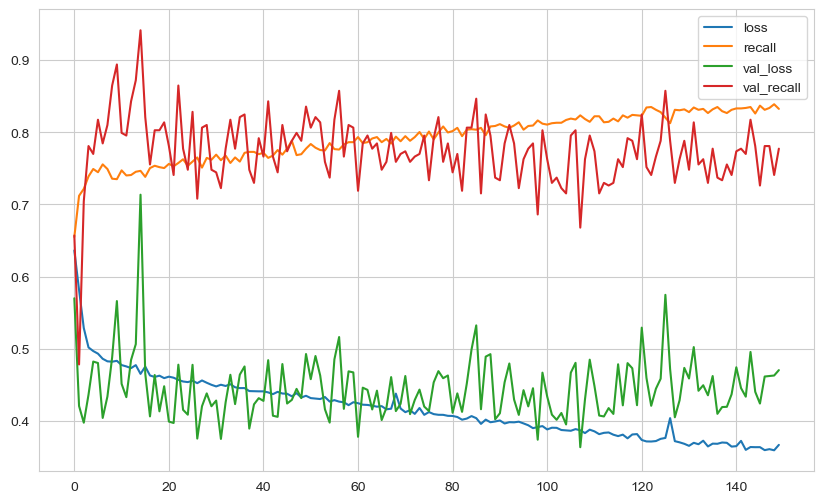

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [66]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5281506180763245
Recall:  0.7303921580314636


In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[608 188]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.44      0.73      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.78      1000



32/32 [==============================] - 0s 4ms/step


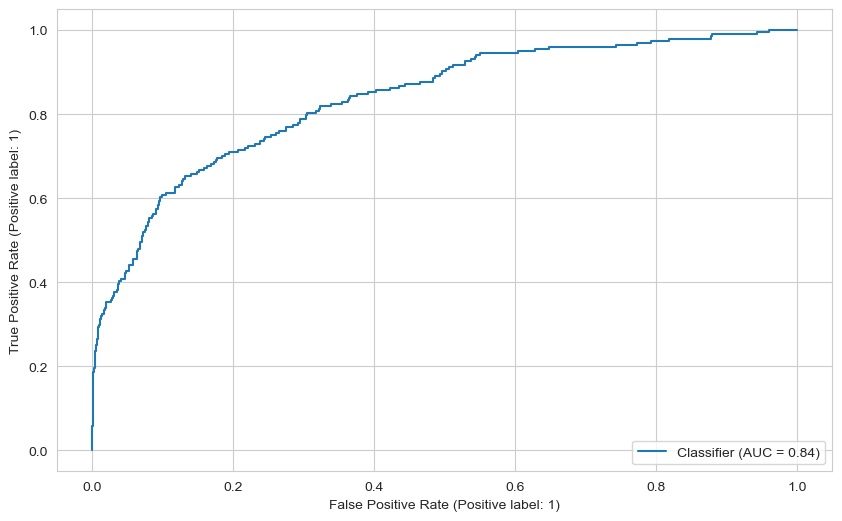

In [68]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [69]:
roc_auc_score(y_test, y_pred_proba)

0.8365664104837915

### Add Dropout Layer

In [70]:
#This layer randomly sets input units to 0 with a frequency of rate
#at each step during training time, which helps prevent overfitting.
from tensorflow.keras.layers import Dropout

In [71]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [72]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=150, verbose=1,class_weight=class_weight)

Epoch 1/150
254/254 [==============================] - 5s 9ms/step - loss: 0.7074 - recall: 0.4413 - val_loss: 0.6736 - val_recall: 0.4696
Epoch 2/150
254/254 [==============================] - 2s 7ms/step - loss: 0.6793 - recall: 0.4516 - val_loss: 0.6759 - val_recall: 0.7072
Epoch 3/150
254/254 [==============================] - 2s 7ms/step - loss: 0.6676 - recall: 0.4800 - val_loss: 0.6459 - val_recall: 0.6630
Epoch 4/150
254/254 [==============================] - 2s 7ms/step - loss: 0.6602 - recall: 0.5163 - val_loss: 0.6193 - val_recall: 0.5856
Epoch 5/150
254/254 [==============================] - 2s 7ms/step - loss: 0.6554 - recall: 0.5575 - val_loss: 0.6249 - val_recall: 0.6354
Epoch 6/150
254/254 [==============================] - 2s 7ms/step - loss: 0.6516 - recall: 0.5648 - val_loss: 0.6015 - val_recall: 0.6243
Epoch 7/150
254/254 [==============================] - 2s 6ms/step - loss: 0.6459 - recall: 0.5430 - val_loss: 0.5822 - val_recall: 0.6409
Epoch 8/150
254/254 [======

254/254 [==============================] - 2s 7ms/step - loss: 0.5339 - recall: 0.6979 - val_loss: 0.4473 - val_recall: 0.8232
Epoch 60/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5300 - recall: 0.7240 - val_loss: 0.4602 - val_recall: 0.8232
Epoch 61/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5292 - recall: 0.7282 - val_loss: 0.4468 - val_recall: 0.8287
Epoch 62/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5347 - recall: 0.7040 - val_loss: 0.4787 - val_recall: 0.8343
Epoch 63/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5338 - recall: 0.7107 - val_loss: 0.4593 - val_recall: 0.8232
Epoch 64/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5306 - recall: 0.7143 - val_loss: 0.4627 - val_recall: 0.8232
Epoch 65/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5270 - recall: 0.7252 - val_loss: 0.4310 - val_recall: 0.8122
Epoch 66/150
254/254 [===========

254/254 [==============================] - 2s 7ms/step - loss: 0.5231 - recall: 0.7294 - val_loss: 0.4497 - val_recall: 0.8287
Epoch 118/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5216 - recall: 0.7294 - val_loss: 0.4465 - val_recall: 0.8398
Epoch 119/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5219 - recall: 0.7427 - val_loss: 0.4365 - val_recall: 0.8177
Epoch 120/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5260 - recall: 0.7379 - val_loss: 0.4375 - val_recall: 0.8287
Epoch 121/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5206 - recall: 0.7264 - val_loss: 0.4725 - val_recall: 0.8508
Epoch 122/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5176 - recall: 0.7476 - val_loss: 0.4270 - val_recall: 0.8177
Epoch 123/150
254/254 [==============================] - 2s 7ms/step - loss: 0.5256 - recall: 0.7385 - val_loss: 0.4783 - val_recall: 0.8564
Epoch 124/150
254/254 [====

<Axes: >

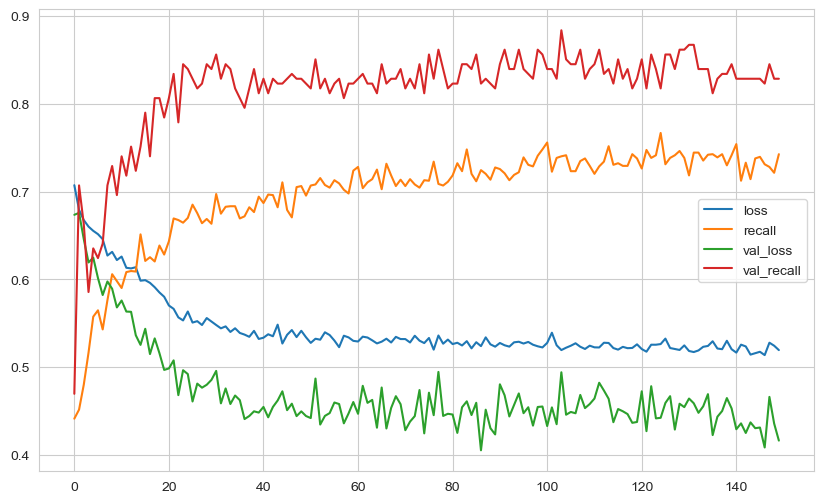

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [74]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4483550488948822
Recall:  0.7450980544090271


In [75]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[628 168]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



32/32 [==============================] - 0s 4ms/step


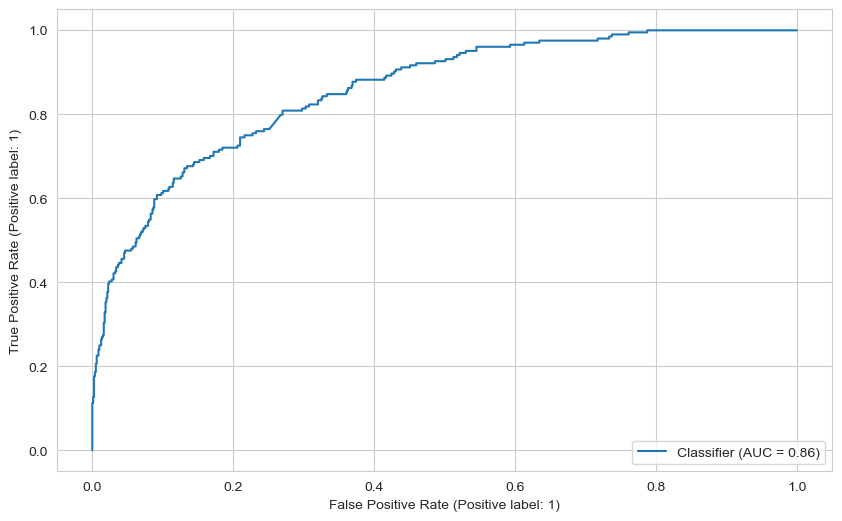

In [76]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.8575136712976648

### Add Early Stop

#### Monitor the "val_loss" as metric

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [80]:
# 10 or 25 is more common value for patience
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [81]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=150,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weight
)

Epoch 1/150
254/254 [==============================] - 5s 8ms/step - loss: 0.6600 - recall: 0.6477 - val_loss: 0.6047 - val_recall: 0.7072
Epoch 2/150
254/254 [==============================] - 2s 6ms/step - loss: 0.6001 - recall: 0.6961 - val_loss: 0.5079 - val_recall: 0.6851
Epoch 3/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5449 - recall: 0.7246 - val_loss: 0.4666 - val_recall: 0.7735
Epoch 4/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5131 - recall: 0.7452 - val_loss: 0.4833 - val_recall: 0.8177
Epoch 5/150
254/254 [==============================] - 2s 6ms/step - loss: 0.4997 - recall: 0.7433 - val_loss: 0.4498 - val_recall: 0.7901
Epoch 6/150
254/254 [==============================] - 2s 6ms/step - loss: 0.4923 - recall: 0.7452 - val_loss: 0.4522 - val_recall: 0.8177
Epoch 7/150
254/254 [==============================] - 2s 6ms/step - loss: 0.4882 - recall: 0.7579 - val_loss: 0.4142 - val_recall: 0.7845
Epoch 8/150
254/254 [======

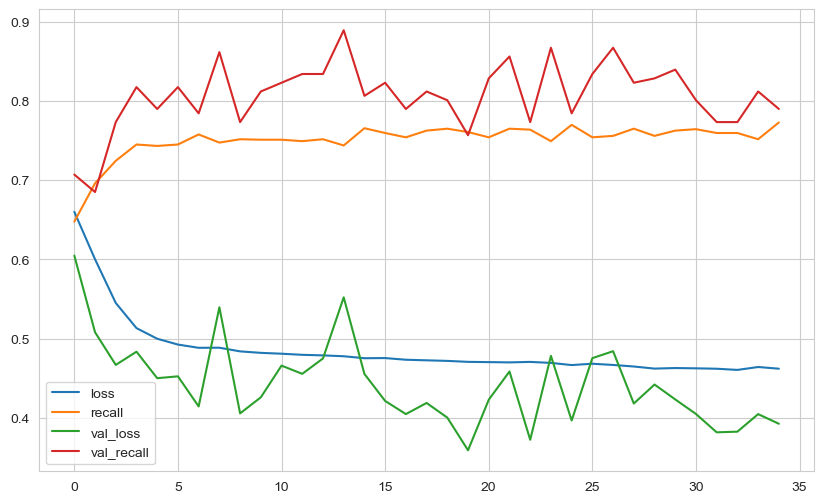

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [83]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4021633565425873
Recall:  0.6666666865348816


In [84]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[677 119]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.53      0.67      0.59       204

    accuracy                           0.81      1000
   macro avg       0.72      0.76      0.74      1000
weighted avg       0.83      0.81      0.82      1000



32/32 [==============================] - 0s 5ms/step


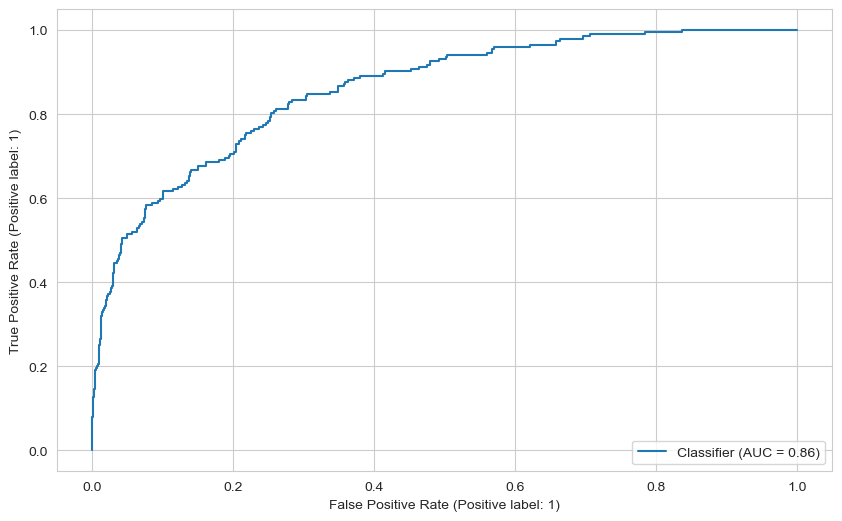

In [85]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [86]:
roc_auc_score(y_test, y_pred_proba)

0.8589762538181102

#### Monitor the "val_recall" as metric

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [88]:
# 10 or 25 is more common value for patience
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [89]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=150,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weight
)

Epoch 1/150
254/254 [==============================] - 4s 8ms/step - loss: 0.6572 - recall: 0.5781 - val_loss: 0.5811 - val_recall: 0.6354
Epoch 2/150
254/254 [==============================] - 2s 6ms/step - loss: 0.6017 - recall: 0.6822 - val_loss: 0.5286 - val_recall: 0.6464
Epoch 3/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5805 - recall: 0.6895 - val_loss: 0.5297 - val_recall: 0.6851
Epoch 4/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5730 - recall: 0.6992 - val_loss: 0.5534 - val_recall: 0.7348
Epoch 5/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5655 - recall: 0.6913 - val_loss: 0.5141 - val_recall: 0.7017
Epoch 6/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5515 - recall: 0.6992 - val_loss: 0.5284 - val_recall: 0.7514
Epoch 7/150
254/254 [==============================] - 2s 6ms/step - loss: 0.5266 - recall: 0.7088 - val_loss: 0.4422 - val_recall: 0.7348
Epoch 8/150
254/254 [======

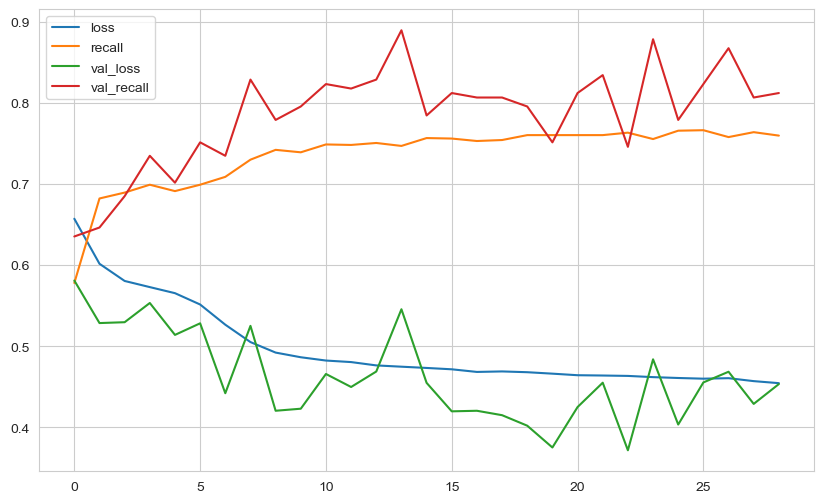

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [91]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5877280235290527
Recall:  0.843137264251709


In [92]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[530 266]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       796
           1       0.39      0.84      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.75      0.66      1000
weighted avg       0.83      0.70      0.73      1000



32/32 [==============================] - 0s 4ms/step


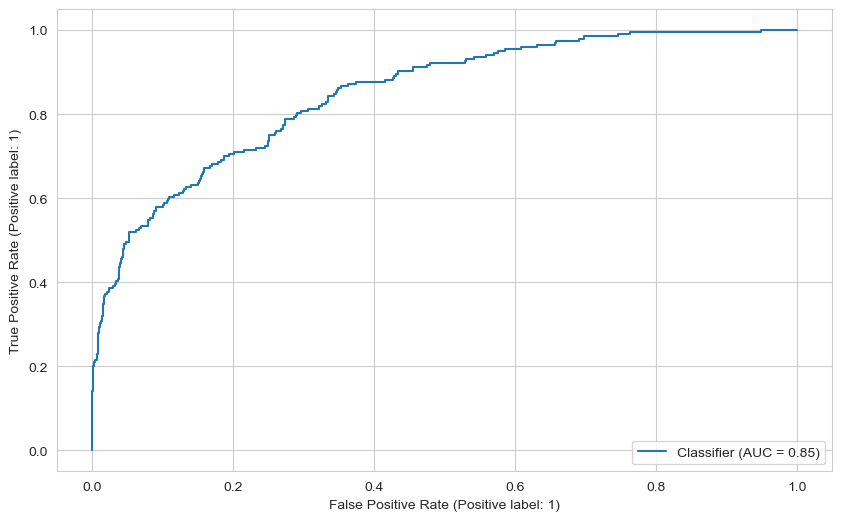

In [93]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [94]:
roc_auc_score(y_test, y_pred_proba)

0.8486981476007489

## Optuna

In [95]:
#!pip install optuna

In [96]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [97]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [98]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    first_hidden_layer = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 3)
    w1 = trial.suggest_loguniform("w1", 0.01, 3)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [99]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 22:08:14,272] A new study created in memory with name: no-name-89d44c7b-5e75-47ea-8fbb-4dcc46c2132e
C:\Users\Taifa\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\Taifa\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\Taifa\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type 

Restoring model weights from the end of the best epoch: 46.
Epoch 61: early stopping


[I 2023-10-30 22:09:19,006] Trial 0 finished with value: 0.4313725531101227 and parameters: {'input_layer_units': 41, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.09671567887330099, 'hidden_layers': 4, 'hidden_layer_units_0': 118, 'hidden_layer_units_1': 102, 'hidden_layer_units_2': 117, 'hidden_layer_units_3': 61, 'w0': 2.462951540865892, 'w1': 1.978064846792041}. Best is trial 0 with value: 0.4313725531101227.


Restoring model weights from the end of the best epoch: 60.
Epoch 75: early stopping


[I 2023-10-30 22:10:22,350] Trial 1 finished with value: 0.36764705181121826 and parameters: {'input_layer_units': 63, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00022767422208320843, 'hidden_layers': 3, 'hidden_layer_units_0': 42, 'hidden_layer_units_1': 28, 'hidden_layer_units_2': 87, 'w0': 2.997764165211256, 'w1': 1.0412550085904808}. Best is trial 0 with value: 0.4313725531101227.
[I 2023-10-30 22:11:42,841] Trial 2 finished with value: 0.0 and parameters: {'input_layer_units': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00013726726909554841, 'hidden_layers': 2, 'hidden_layer_units_0': 40, 'hidden_layer_units_1': 66, 'w0': 2.1072713967843026, 'w1': 0.019020771919081365}. Best is trial 0 with value: 0.4313725531101227.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:12:03,165] Trial 3 finished with value: 1.0 and parameters: {'input_layer_units': 32, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.007903896341533e-05, 'hidden_layers': 3, 'hidden_layer_units_0': 16, 'hidden_layer_units_1': 103, 'hidden_layer_units_2': 90, 'w0': 0.059479043849638265, 'w1': 0.5853686109879982}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 22:12:21,918] Trial 4 finished with value: 0.0 and parameters: {'input_layer_units': 68, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.11504980202241408, 'hidden_layers': 2, 'hidden_layer_units_0': 61, 'hidden_layer_units_1': 49, 'w0': 0.31240414904333247, 'w1': 0.019584600962847764}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-10-30 22:13:11,142] Trial 5 finished with value: 0.09313725680112839 and parameters: {'input_layer_units': 63, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.01761331741084861, 'hidden_layers': 6, 'hidden_layer_units_0': 86, 'hidden_layer_units_1': 11, 'hidden_layer_units_2': 11, 'hidden_layer_units_3': 35, 'hidden_layer_units_4': 56, 'hidden_layer_units_5': 44, 'w0': 1.8453210322892581, 'w1': 0.0567243628199878}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 42.
Epoch 57: early stopping


[I 2023-10-30 22:14:00,183] Trial 6 finished with value: 0.75 and parameters: {'input_layer_units': 51, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0659434340564016, 'hidden_layers': 2, 'hidden_layer_units_0': 102, 'hidden_layer_units_1': 82, 'w0': 0.1020237741680393, 'w1': 1.0681016455313195}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 22:14:23,982] Trial 7 finished with value: 0.0 and parameters: {'input_layer_units': 86, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.728729146728984e-05, 'hidden_layers': 4, 'hidden_layer_units_0': 13, 'hidden_layer_units_1': 24, 'hidden_layer_units_2': 96, 'hidden_layer_units_3': 69, 'w0': 0.28460431115484897, 'w1': 0.1556460060093862}. Best is trial 3 with value: 1.0.
[I 2023-10-30 22:16:02,864] Trial 8 finished with value: 0.5196078419685364 and parameters: {'input_layer_units': 65, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.8050243905857046e-05, 'hidden_layers': 5, 'hidden_layer_units_0': 125, 'hidden_layer_units_1': 57, 'hidden_layer_units_2': 15, 'hidden_layer_units_3': 36, 'hidden_layer_units_4': 70, 'w0': 0.03109290600922024, 'w1': 0.016104888733520718}. Best is trial 3 with value: 1.0.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 22:16:29,649] Trial 9 finished with value: 0.0 and parameters: {'input_layer_units': 63, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.028007372809194245, 'hidden_layers': 5, 'hidden_layer_units_0': 91, 'hidden_layer_units_1': 122, 'hidden_layer_units_2': 29, 'hidden_layer_units_3': 35, 'hidden_layer_units_4': 46, 'w0': 0.051703644162067686, 'w1': 0.01628742286284002}. Best is trial 3 with value: 1.0.


{'input_layer_units': 32,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 6.007903896341533e-05,
 'hidden_layers': 3,
 'hidden_layer_units_0': 16,
 'hidden_layer_units_1': 103,
 'hidden_layer_units_2': 90,
 'w0': 0.059479043849638265,
 'w1': 0.5853686109879982}

In [102]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    #study.best_params["hidden_layer_units_3"],
    #study.best_params["hidden_layer_units_4"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             #hidden_layer_units_4,
             #hidden_layer_units_5
             ]

tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 6s 60ms/step - loss: 0.6512 - recall: 0.0000e+00 - val_loss: 0.6438 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 17ms/step - loss: 0.6388 - recall: 0.0000e+00 - val_loss: 0.6299 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 0.6247 - recall: 0.0000e+00 - val_loss: 0.6151 - val_recall: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 17ms/step - loss: 0.6100 - recall: 0.0000e+00 - val_loss: 0.5997 - val_recall: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5951 - recall: 0.0000e+00 - val_loss: 0.5841 - val_recall: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5799 - recall: 0.0000e+00 - val_loss: 0.5684 - val_recall: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 18ms/step - loss: 0.5649 - recall: 0.0000e+00 - val_loss: 0.5528 - v

16/16 [==============================] - 0s 15ms/step - loss: 0.4577 - recall: 0.0539 - val_loss: 0.4377 - val_recall: 0.0773
Epoch 58/100
16/16 [==============================] - 0s 16ms/step - loss: 0.4570 - recall: 0.0617 - val_loss: 0.4369 - val_recall: 0.0829
Epoch 59/100
16/16 [==============================] - 0s 15ms/step - loss: 0.4563 - recall: 0.0599 - val_loss: 0.4358 - val_recall: 0.0829
Epoch 60/100
16/16 [==============================] - 0s 15ms/step - loss: 0.4555 - recall: 0.0714 - val_loss: 0.4350 - val_recall: 0.1050
Epoch 61/100
16/16 [==============================] - 0s 15ms/step - loss: 0.4547 - recall: 0.0781 - val_loss: 0.4341 - val_recall: 0.1050
Epoch 62/100
16/16 [==============================] - 0s 15ms/step - loss: 0.4541 - recall: 0.0714 - val_loss: 0.4332 - val_recall: 0.1050
Epoch 63/100
16/16 [==============================] - 0s 16ms/step - loss: 0.4533 - recall: 0.0866 - val_loss: 0.4325 - val_recall: 0.1160
Epoch 64/100
16/16 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

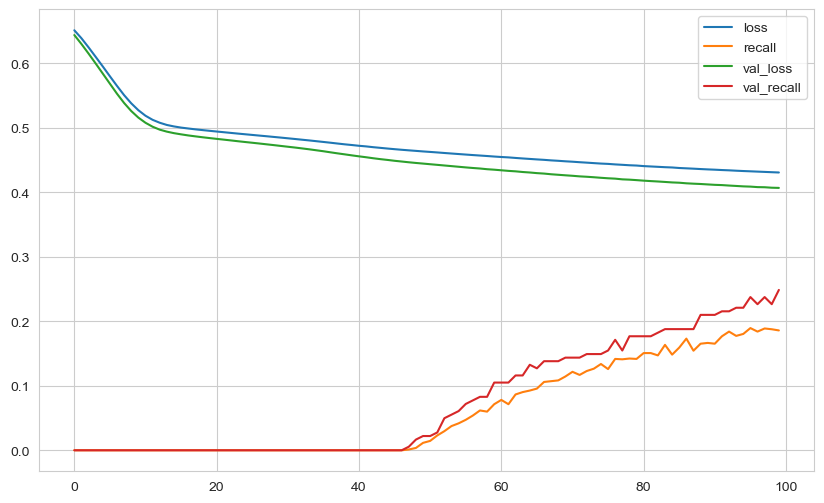

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [104]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 32)                448       
                                                                 
 dense_81 (Dense)            (None, 16)                528       
                                                                 
 dense_82 (Dense)            (None, 103)               1751      
                                                                 
 dense_83 (Dense)            (None, 90)                9360      
                                                                 
 dense_84 (Dense)            (None, 1)                 91        
                                                                 
Total params: 12178 (47.57 KB)
Trainable params: 12178 (47.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[769  27]
 [165  39]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       796
           1       0.59      0.19      0.29       204

    accuracy                           0.81      1000
   macro avg       0.71      0.58      0.59      1000
weighted avg       0.78      0.81      0.77      1000



32/32 [==============================] - 0s 4ms/step


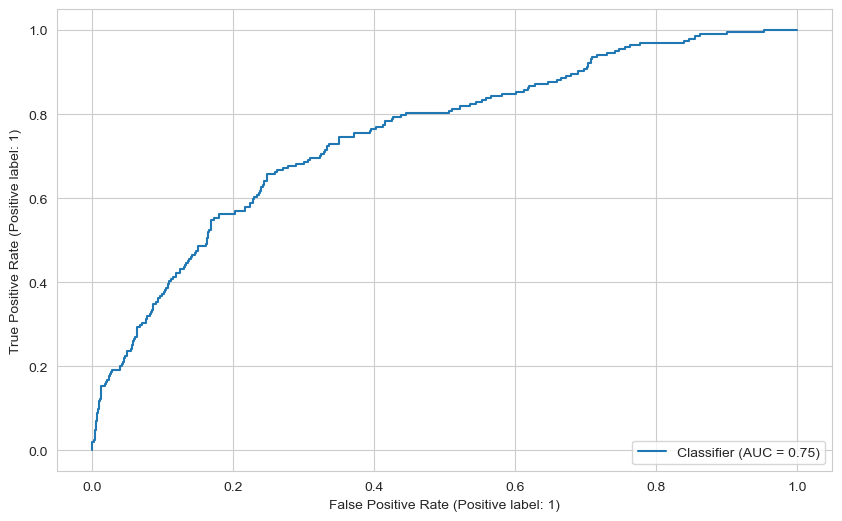

In [106]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [107]:
roc_auc_score(y_test, y_pred_proba)

0.7508744703911715

# Final Model and Model Deployment

### Final Model Training

In [108]:
scaler = MinMaxScaler().fit(X)

In [109]:
import pickle

pickle.dump(scaler, open("scaler_1-Churn_Modelling", "wb"))

In [110]:
X_scaled = scaler.transform(X)

In [111]:
# My final model is the best model that i get as trail 3 was the best one with the following hyperpaarameters:
# {'input_layer_units': 32,
#  'optimizer': keras.src.optimizers.nadam.Nadam,
#  'learning_rate': 6.007903896341533e-05,
#  'hidden_layers': 3,
#  'hidden_layer_units_0': 16,
#  'hidden_layer_units_1': 103,
#  'hidden_layer_units_2': 90,
#  'w0': 0.059479043849638265,
#  'w1': 0.5853686109879982}


# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    #study.best_params["hidden_layer_units_3"],
    #study.best_params["hidden_layer_units_4"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             #hidden_layer_units_4,
             #hidden_layer_units_5
             ]

tf.random.set_seed(42)
# instantiate the final model
final_model = Sequential()
final_model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  final_model.add(Dense(hidden_layer_units[i], activation="relu"))

final_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
final_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
final_model.fit(x=X_scaled, y=y, batch_size=32, epochs=150,
    callbacks=[early_stop],verbose=1,
)

Epoch 1/150
313/313 [==============================] - 8s 6ms/step - loss: 0.5585 - recall: 0.0029
Epoch 2/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4928 - recall: 0.0000e+00
Epoch 3/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4794 - recall: 0.0000e+00
Epoch 4/150
313/313 [==============================] - 2s 7ms/step - loss: 0.4693 - recall: 0.0000e+00
Epoch 5/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4635 - recall: 0.0128
Epoch 6/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4591 - recall: 0.0530
Epoch 7/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4548 - recall: 0.0638
Epoch 8/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4509 - recall: 0.0849
Epoch 9/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4472 - recall: 0.1100
Epoch 10/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4439 - recall: 0.13

313/313 [==============================] - 2s 6ms/step - loss: 0.4219 - recall: 0.2568
Epoch 28/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4211 - recall: 0.2543
Epoch 29/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4201 - recall: 0.2563
Epoch 30/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4194 - recall: 0.2631
Epoch 31/150
313/313 [==============================] - 3s 10ms/step - loss: 0.4189 - recall: 0.2676
Epoch 32/150
313/313 [==============================] - 3s 9ms/step - loss: 0.4176 - recall: 0.2685
Epoch 33/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4168 - recall: 0.2730
Epoch 34/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4161 - recall: 0.2680
Epoch 35/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4155 - recall: 0.2720
Epoch 36/150
313/313 [==============================] - 2s 6ms/step - loss: 0.4146 - recall: 0.2818
Epoch 37/150

313/313 [==============================] - 2s 6ms/step - loss: 0.4000 - recall: 0.3117
Epoch 55/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3991 - recall: 0.3132
Epoch 56/150
313/313 [==============================] - 2s 5ms/step - loss: 0.3986 - recall: 0.3078
Epoch 57/150
313/313 [==============================] - 2s 5ms/step - loss: 0.3974 - recall: 0.3132
Epoch 58/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3964 - recall: 0.3250
Epoch 59/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3953 - recall: 0.3284
Epoch 60/150
313/313 [==============================] - 2s 7ms/step - loss: 0.3942 - recall: 0.3279
Epoch 61/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3930 - recall: 0.3348
Epoch 62/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3917 - recall: 0.3387
Epoch 63/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3906 - recall: 0.3378
Epoch 64/150


313/313 [==============================] - 2s 6ms/step - loss: 0.3604 - recall: 0.4084
Epoch 82/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3590 - recall: 0.4143
Epoch 83/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3575 - recall: 0.4119
Epoch 84/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3565 - recall: 0.4212
Epoch 85/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3554 - recall: 0.4212
Epoch 86/150
313/313 [==============================] - 2s 7ms/step - loss: 0.3546 - recall: 0.4261
Epoch 87/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3536 - recall: 0.4266
Epoch 88/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3528 - recall: 0.4256
Epoch 89/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3519 - recall: 0.4271
Epoch 90/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3511 - recall: 0.4315
Epoch 91/150


313/313 [==============================] - 2s 6ms/step - loss: 0.3418 - recall: 0.4477
Epoch 109/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3418 - recall: 0.4531
Epoch 110/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3413 - recall: 0.4512
Epoch 111/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3412 - recall: 0.4502
Epoch 112/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3406 - recall: 0.4570
Epoch 113/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3403 - recall: 0.4536
Epoch 114/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3402 - recall: 0.4566
Epoch 115/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3398 - recall: 0.4551
Epoch 116/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3392 - recall: 0.4590
Epoch 117/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3393 - recall: 0.4556
Epoc

313/313 [==============================] - 2s 6ms/step - loss: 0.3343 - recall: 0.4718
Epoch 135/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3338 - recall: 0.4644
Epoch 136/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3340 - recall: 0.4644
Epoch 137/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3336 - recall: 0.4688
Epoch 138/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3334 - recall: 0.4708
Epoch 139/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3332 - recall: 0.4693
Epoch 140/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3327 - recall: 0.4732
Epoch 141/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3324 - recall: 0.4737
Epoch 142/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3324 - recall: 0.4728
Epoch 143/150
313/313 [==============================] - 2s 6ms/step - loss: 0.3323 - recall: 0.4752
Epoc

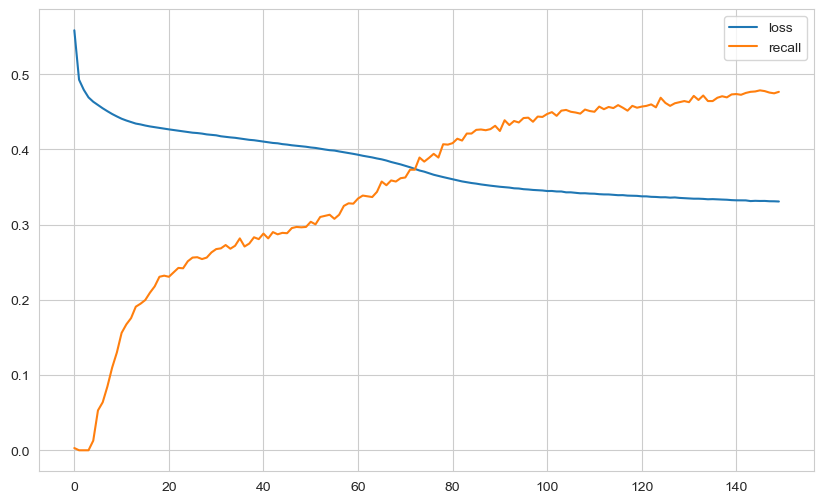

In [112]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()
plt.show()

In [113]:
loss, Recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.33462151885032654
Recall:  0.44607841968536377


In [114]:
y_pred = final_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[774  22]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.84      0.71      0.75      1000
weighted avg       0.86      0.86      0.85      1000



### Saving a Model

In [115]:
final_model.save("model_Churn_Modelling")

INFO:tensorflow:Assets written to: model_Churn_Modelling\assets


INFO:tensorflow:Assets written to: model_Churn_Modelling\assets


### Loading Model 

In [116]:
from tensorflow.keras.models import load_model

In [117]:
model_Churn_Modelling = load_model("model_Churn_Modelling")

In [118]:
scaler_Churn_Modelling = pickle.load(open("scaler_1-Churn_Modelling", "rb"))

## Prediction

In [119]:
single_prediction = df.drop("Exited", axis=1).iloc[0:1, :]
single_prediction

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1.000,0.000,0.000,1.000,0.000


In [120]:
single_prediction = scaler_Churn_Modelling.transform(single_prediction)
single_prediction

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [121]:
(model_Churn_Modelling.predict(single_prediction) > 0.5).astype("int32")

1/1 [==============================] - 0s 180ms/step


array([[0]])

In [122]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___